<h2>Code-Beispiel: Levenberg-Marquardt Verfahren</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Im folgenden befindet sich eine Implementierung des Levenberg-Marquardt Verfahrens. Im zweiten Code-Block können die Eingabeparameter geändert und das dazugehörige Ergebnis berechnet werden.</p>
<p style="text-align:justify">Dazu muss jedoch zuerst auch in den ersten Block geklickt werden und dieser durch drücken der "Run" Taste in der Leiste oben ausgeführt werden.</p>
</font>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


# Zielfunktion
def function(p, x):
    return p[2] - math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)
    
    
# Partielle Ableitungen der Zielfunktion
def f_par_deriv_z1(p, x):
    return -(p[0]-x[0]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_z2(p, x):
    return -(p[1]-x[1]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_R(p,x):
    return 1

nabla_function = [f_par_deriv_z1, f_par_deriv_z2, f_par_deriv_R]


# Berechnen der Jakobi Matrix
def jacobian(p, points, nabla_f):
    rows = np.shape(points)[0] 
    cols = np.shape(p)[0]
    J = np.zeros((rows,cols))
    for row in range(rows):
        for col in range(cols):
            J[row][col] = nabla_f[col](p, points[row])
    return J
    

# Berechnen des Residual
def residual(p, points):
    rows = np.shape(points)[0]
    # Residual Vektor initialisieren
    r = np.zeros(rows)
    for row in range(rows):
        r[row] = function(p, points[row])
    return r


# Gauss Newton Verfahren
def LevenbergMarquardt(nabla_f, p0, x, lamb, lambda_up, lambda_down):
    # Residual, Parameter and Cost initialisieren
    r = residual(p0, x)
    p = p0
    cost = 0.5 * np.linalg.norm(r)**2

    # Abbruchbedingungen
    MAX_ITER = 1000
    MIN_DELTA = 0.0001
    EPSILON = 0.000001
    
    i = 0
    while i < MAX_ITER:
        i = i+1
        
        # aktuellen Kreis darstellen
        circle = plt.Circle((p[0], p[1]), radius=p[2], fc='none', ec=[max(0.9-0.05*i, 0), max(0.9-0.05*i, 0), max(0.9-0.05*i, 0)])
        plt.gca().add_patch(circle)
        
        # neue Jakobi Matrix berechnen
        J = jacobian(p, x, nabla_f)
        Jt = np.transpose(J)
        
        # Gradient und Kostengradient berechnen
        G = np.dot(Jt, J) + lamb*np.eye(len(Jt))
        Cost_G = np.dot(Jt, r)
        
        # Parameter aktualisieren
        p_neu = p - np.transpose(np.dot(np.linalg.inv(G), Cost_G))
        
        # Resultat des Schrittes
        r_neu = residual(p_neu, x)
        cost_neu = 0.5 * np.linalg.norm(r_neu)**2
                

        # Abbruchbedingungen prüfen
        if np.linalg.norm(r) < EPSILON or cost-cost_neu < MIN_DELTA:
            break
            
        # wenn der Schritt die Kosten gesenkt hat gehe ihn und verringere lambda
        if cost_neu < cost:
            p = p_neu
            r = r_neu
            cost = cost_neu
            lamb = lamb / lambda_down
        # andernfalls gehe den Schrtitt nicht und erhöhe lambda
        else:
            lamb = lamb * lambda_up
            
        
    # Parameter und Anzahl der Iterationen zurückgeben
    ret = [p, i]
    return ret


# Funktion um verrauschte Messpunkte zu generieren
def getPoints(x, std, R, z_eins, z_zwei):
    for i in range(np.size(x,0)):
        x[i][1] = (- math.sqrt(R**2 - (z_eins - x[i][0])**2) + z_zwei) + np.random.normal(0, std)     
    return x

<font size="3" face="Verdana">
<p style="text-align:justify">Die Startparameter, Lambda und die Messpunkte können beliebig geändert werden. Zum Ausführen des Codes muss zunächst in das Feld mit dem Code geklickt werden und dann in der Leiste oben auf "Run".</p>

Messpunkte:
( -1 , 2.067934815798045 )
( 0 , -0.26930630420021584 )
( 2 , -1.3079833444894509 )
( 2.5 , -1.0670043572099035 )
( 3 , -0.7119302585582846 )
( 4 , -0.21742441336755253 )
Kreis durch die gegebenen Punkte:


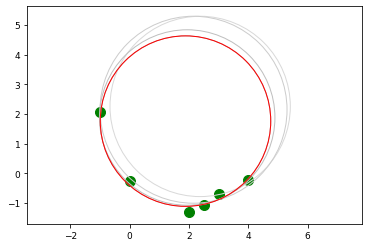

Parameter:
z1:  1.8859313262803468
z2:  1.7585247824451504
R:  2.871218631757836
Anzahl der Interationen: 4


In [3]:
########################################################################
# Startparameter (z1, z2, R)
p0 = [2.3794, 2.2532, 3.0370]

# Messpunkte: x Werte gegeben, y Werte werden mit get Points berechnet und mit einer Gaußschen Normalverteilung verrauscht
#(0 = kein Rauschen)
# getPoionts(Messpunkte, Standardabweichung, Radius, z1, z2)
# getPoionts([[x1, 0], [x2, 0], [x3, 0], ... , Standardabweichung, Radius, z1, z2)
x = getPoints([[-1, 0], [0, 0], [2, 0], [2.5, 0], [3, 0], [4, 0]], 0.1, 3, 2, 2)

#lambda
lamb = 1
# lambda factors
lambda_up = 1.5
lambda_down = 10
########################################################################

# Messpunkte anzeigen
print("Messpunkte:")
for i in range(np.shape(x)[0]):
    print("(" , x[i][0] , "," , x[i][1] , ")")
for i in range(np.shape(x)[0]):
    plt.scatter(x[i][0], x[i][1], s=100, facecolors='g', edgecolors='g')

# Levenberg-Marquardt Verfahren anwenden
res = LevenbergMarquardt(nabla_function, p0, x, lamb, lambda_up, lambda_down)

# den letzten Kreis in rot darstellen
circle = plt.Circle((res[0][0], res[0][1]), radius=res[0][2], fc='none', ec='r')
plt.gca().add_patch(circle)

# Schaubild anzeigen
print("Kreis durch die gegebenen Punkte:")
plt.tick_params(axis='both', which='major', labelsize=9)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.axis('equal')
plt.show()

# Resultate anzeigen
print("Parameter:")
print("z1: ", res[0][0])
print("z2: ", res[0][1])
print("R: ", res[0][2])
print("Anzahl der Interationen:", res[1])